In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
import scipy.stats as sts
import os

#import citipy
import urllib.parse
import requests
import json

In [4]:
#!pip install fuzzywuzzy

In [5]:
from fuzzywuzzy import fuzz, process


C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [6]:
url_api = 'https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/Alcohol_Related/FeatureServer/0/query?where=1%3D1&outFields=YEAR,DATE,District,WardNum,Division,LATITUDE,LONGITUDE,LIGHT,ACCLASS,INJURY,VEHTYPE,DRIVCOND,Neighbourhood,ObjectId&outSR=4326&f=json'
tor_pd = requests.get(url_api)
from pprint import pprint
#pprint (tor_pd.text)

In [7]:
tpd_data = tor_pd.json()
#pprint(tpd_data)

In [8]:
tpd_data['features']
tpd_data_ft = tpd_data['features']
#tpd_data_ft
#tor_pd_df = pd.DataFrame(pd.json_normalize(tor_pd.json()))
#tor_pd_df = pd.json_normalize

In [9]:
for k, v, in tpd_data_ft[0].items():
    print(k)
    
#for key and value in... 

attributes
geometry


In [10]:
#with open ('tor_pd_alcohol.csv', 'w') as outfile:
#    json.dump(tpd_data_ft, outfile)

In [11]:
tor_pd_df = pd.json_normalize(data=tpd_data_ft, record_prefix=None)

In [12]:
tor_pd_df.columns = tor_pd_df.columns.str.strip('attributes.')

In [13]:
tor_pd_df

,YEAR,DATE,Distric,WardNum,Division,LATITUDE,LONGITUDE,LIGHT,ACCLASS,INJURY,VEHTYPE,DRIVCOND,Neighbourhood,ObjectId,geometry.x,geometry.y
0,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Major,None,None,Woodbine-Lumsden (60),1,-79.318797,43.699595
1,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Minor,None,None,Woodbine-Lumsden (60),2,-79.318797,43.699595
2,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Minor,"Automobile, Station Wagon",Normal,Woodbine-Lumsden (60),3,-79.318797,43.699595
3,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Minor,None,None,Woodbine-Lumsden (60),4,-79.318797,43.699595
4,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Minor,None,None,Woodbine-Lumsden (60),5,-79.318797,43.699595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,2019,1564113600000,North York,NaN,41,43.757865,-79.315212,"Dark, artificial",Non-Fatal Injury,Major,"Automobile, Station Wagon",Normal,Wexford/Maryvale (119),709,-79.315212,43.757865
709,2019,1564113600000,North York,NaN,41,43.757865,-79.315212,"Dark, artificial",Non-Fatal Injury,Minimal,None,None,Wexford/Maryvale (119),710,-79.315212,43.757865
710,2019,1564113600000,North York,NaN,41,43.757865,-79.315212,"Dark, artificial",Non-Fatal Injury,Minimal,None,None,Wexford/Maryvale (119),711,-79.315212,43.757865
711,2019,1564113600000,North York,NaN,41,43.757865,-79.315212,"Dark, artificial",Non-Fatal Injury,Minimal,None,None,Wexford/Maryvale (119),712,-79.315212,43.757865


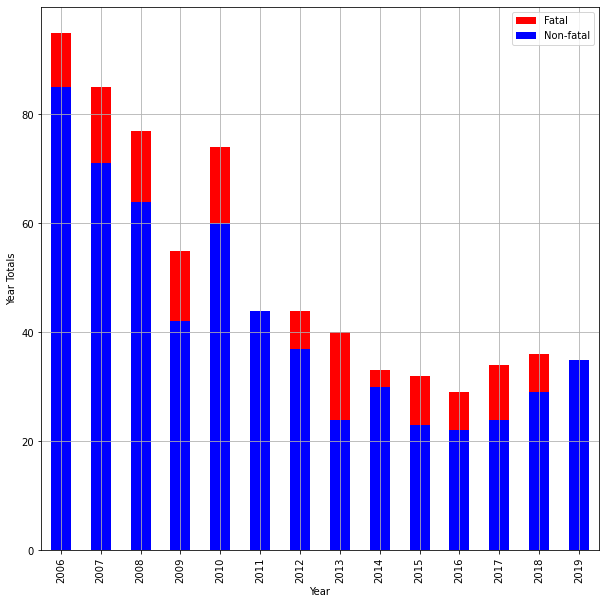

In [14]:
#year totals

year_total_crime = tor_pd_df.groupby(['YEAR']).count()['DATE']

year_total_nonfatal_df = tor_pd_df.loc[lambda tor_pd_df : tor_pd_df['ACCLASS']=='Non-Fatal Injury']
year_total_nonfatal = year_total_nonfatal_df.groupby(['YEAR']).count()['DATE']

plt.figure(figsize =(10,10))

ax1 = year_total_crime.plot.bar(color='red')
ax2 =  year_total_nonfatal.plot.bar(color='blue', grid =True)


h1, l1 = ax1.get_legend_handles_labels()
l1 = ['Fatal', "Non-fatal"]
plt.legend(h1, l1, loc=1)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Year Totals')
plt.grid()
plt.show()


In [15]:
year_total_crime

YEAR
2006    95
2007    85
2008    77
2009    55
2010    74
2011    44
2012    44
2013    40
2014    33
2015    32
2016    29
2017    34
2018    36
2019    35
Name: DATE, dtype: int64

In [16]:
year_crime = tor_pd_df['YEAR'].unique()

#to count how many unique neighboorhoods there are

print (len(tor_pd_df['Neighbourhood'].unique()), "neighbourhoods")

#group crimes by neighboorhood and year
neighbourhood_totals = tor_pd_df.groupby(['Neighbourhood']).count()['DATE']




87 neighbourhoods


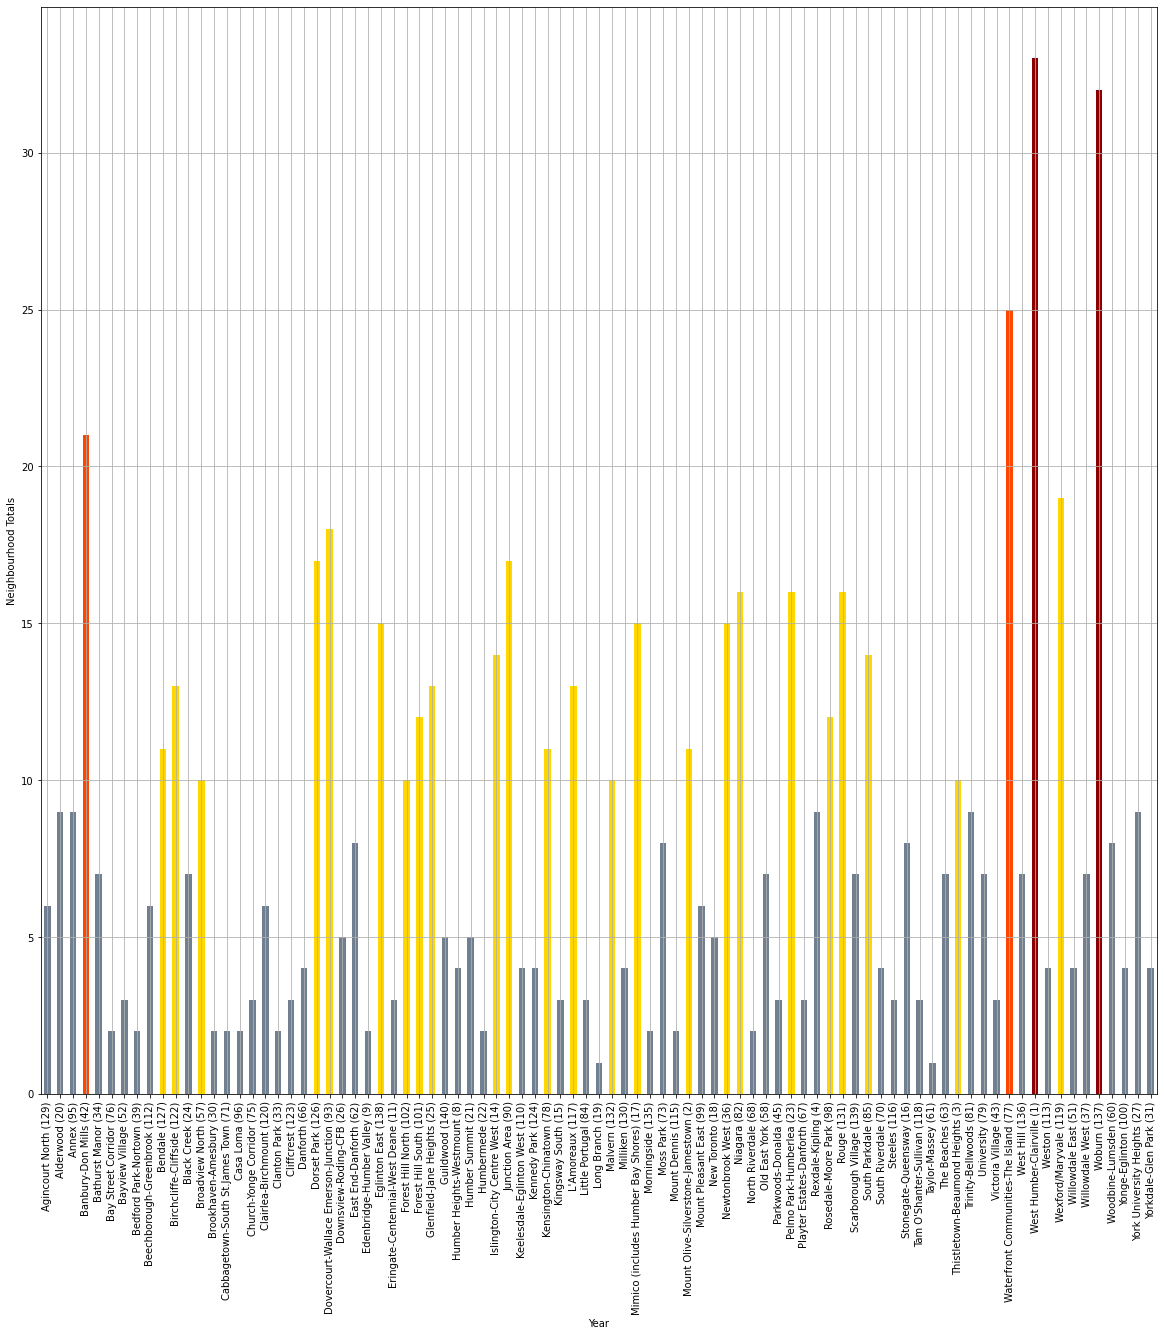

In [17]:
colors = []

for index, value in neighbourhood_totals.items():
    #print (f'Index : {index}, Value: {value}')
    if value >=30:
        colors.append('darkred')
    elif value >=20:
        colors.append('orangered')
    elif value >=10:
        colors.append('gold')
    else:
        colors.append('slategrey')
    
    
plt.figure(figsize =(20,20))
neighbourhood_totals.plot.bar(color=colors)
plt.xlabel('Year')
plt.ylabel('Neighbourhood Totals')
plt.grid()
plt.savefig('Toronto_Cumilative_Alcohol.png', dpi=300)
plt.show()


In [18]:
neighbourhoods = tor_pd_df['Neighbourhood'].unique()
neighbourhoods.sort()
#neighbourhoods

In [19]:
#neighbourhood median incomes
gta_income = pd.read_csv('Resources/tor_hh_income_2016_cmhc.csv', thousands=',')
gta_income.head(10)


,Neighbourhood,Average Household Income Before Taxes,Median Household Income Before Taxes,Average Household Income After Taxes,Median Household Income After Taxes
0,Agincourt/Malvern,80147,68108,71025,62304
1,Ajax/Pickering,115659,98363,94805,84664
2,Alderwood,102434,83249,84163,73039
3,Aurora,147604,106761,113594,90592
4,Banbury-Don Mills/York Mills,245866,90620,168106,76046
5,Bathurst Manor,95977,69634,79185,62172
6,Bay Street Corridor,85657,48737,65786,44028
7,Bayview Village,96616,67355,76983,58341
8,Bayview Woods-Steeles/Hillcrest Village,96267,74082,79794,65844
9,Bedford Park-Nortown,252266,116672,175773,98522


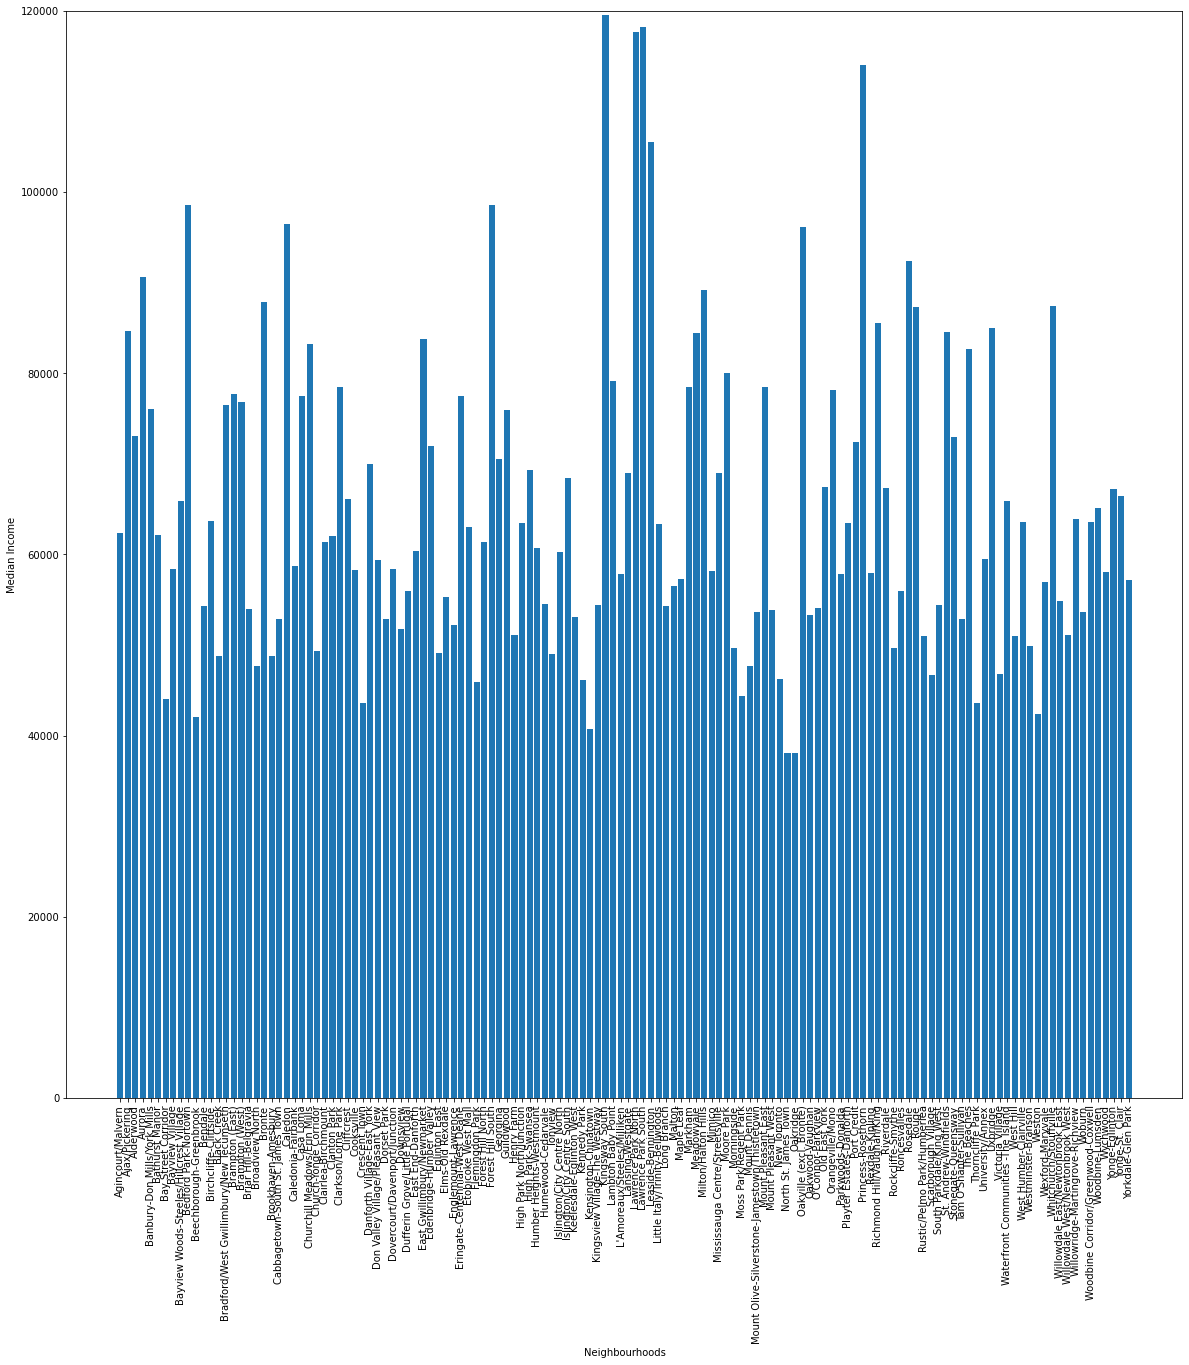

In [20]:
# neighbourhoods_gta = gta_income['Neighbourhood']
#median_income_afttax = gta_income['Median Household Income After Taxes']


plt.figure(figsize =(20,20))
plt.bar(gta_income['Neighbourhood'], gta_income['Median Household Income After Taxes'])
#gta_income.plot(x=['Neighbourhood'], y =['Median Household Income After Taxes'], kind ='bar' )
plt.xticks(fontsize = 10, rotation =90)
plt.xlabel('Neighbourhoods')
plt.ylabel('Median Income')
plt.ylim(0,120000)
plt.savefig('GTA_Income_2016.png', dpi=300)
# plt.grid()
plt.show()




In [21]:
# #west_humber = tor_pd_df.loc[tor_pd_df['Neighbourhood' == 'West Humber-Clairville (1)']]
# west_humber = tor_pd_df.loc[lambda tor_pd_df: tor_pd_df['Neighbourhood']=='West Humber-Clairville (1)']
# #west_humber.head(35)

# west_fatal_df = west_humber.loc[lambda west_humber : west_humber['ACCLASS']!='Non-Fatal Injury']
# #west_fatal_df
# west_fatal_total = west_fatal_df.groupby(['YEAR']).count()['DATE']
# #west_fatal_total

# west_non_fatal_df = west_humber.loc[lambda west_humber : west_humber['ACCLASS']=='Non-Fatal Injury']
# west_non_fatal = west_non_fatal_df.groupby(['YEAR']).count()['DATE']
# west_non_fatal

#create an full series by appending empty years for visual effect, for both fatal and non-fatal

In [22]:
gdp_data = pd.read_csv('Resources\Canada_GDP_1960-2018.csv')


In [48]:
gdp_data.sort_values('Date', ascending=True, inplace=True)
gdp_data.head()



,Date,Canada Annual GDP (M),GDP Growth (%),GDP per capita,GDP P.C. Annual Growth,Unnamed: 5
58,1960,40462,NaN,1960,2259,NaN
57,1961,40935,3.10%,1961,2240,-0.80%
56,1962,42227,7.40%,1962,2269,1.30%
55,1963,45030,5.30%,1963,2375,4.70%
54,1964,49378,6.60%,1964,2555,7.60%


In [49]:
gdp_selection = gdp_data.loc[lambda gdp_data : gdp_data ['Date']>=2006]

In [50]:
gdp_year = gdp_selection['Date']
gdp_annual = gdp_selection['Canada Annual GDP (M)']


In [51]:
#aligning dates so that 2019 from DUI/alcohols is dropped
year_crime = year_total_crime.drop(labels=2019)
year_nonfatal = year_total_nonfatal.drop(labels=2019)

years2 = tor_pd_df['YEAR'].sort_values().unique()
years2

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019], dtype=int64)

In [52]:
gdp_year2 = gdp_year.sort_values()

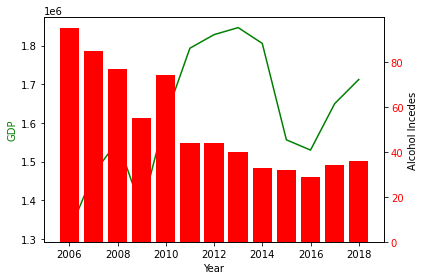

In [53]:
fig, ax1 = plt.subplots()


ax1.set_xlabel('Year')
ax1.set_ylabel('GDP', color='green')
ax1.plot(gdp_year, gdp_annual, color= 'green')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Alcohol Incedes')  # we already handled the x-label with ax1
ax2.bar(gdp_year2, year_crime, color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [55]:
neighbourhood1 = tor_pd_df['Neighbourhood'].unique()

In [56]:
neighbourhood2 = gta_income['Neighbourhood'].unique()

In [57]:
temp_list =[]
for neigh in neighbourhood1:
    try:
        result, score = process.extractOne(neigh, neighbourhood2, scorer=fuzz.token_set_ratio, score_cutoff=80)
        temp_list.append({'tor_pd_neigh': neigh, 'income_neigh': result, 'Score':score})
        # score_cutoff=80
    except:
        pass
neigh_fix = pd.DataFrame(temp_list)

In [26]:
neigh_fix


,tor_pd_neigh,income_neigh,Score
0,Woodbine-Lumsden (60),Woodbine-Lumsden,100
1,Mimico (includes Humber Bay Shores) (17),Mimico,100
2,Eglinton East (138),Eglinton East,100
3,Trinity-Bellwoods (81),Little Italy/Trinity-Bellwoods,92
4,York University Heights (27),University/Annex,77
...,...,...,...
82,Steeles (116),Bayview Woods-Steeles/Hillcrest Village,78
83,Tam O'Shanter-Sullivan (118),Tam O'Shanter-Sullivan,100
84,Yonge-Eglinton (100),Yonge-Eglinton,100
85,Edenbridge-Humber Valley (9),Edenbridge-Humber Valley,100


In [58]:
pd.options.display.max_rows = 99
neigh_fix.sort_values('Score',inplace=True,ascending =False)

In [59]:
neigh_fix = neigh_fix.drop_duplicates(subset='tor_pd_neigh', keep='first')

In [60]:
neigh_fix_dict=neigh_fix.set_index('income_neigh').to_dict()['tor_pd_neigh']

In [61]:
gta_income["Neighbourhood_fix"] = gta_income["Neighbourhood"].map(neigh_fix_dict)
#df["B"] = df["A"].map(equiv)

In [62]:
gta_income.dropna(inplace=True)
gta_income.reset_index(inplace=True, drop=True)

In [63]:
gta_income

,Neighbourhood,Average Household Income Before Taxes,Median Household Income Before Taxes,Average Household Income After Taxes,Median Household Income After Taxes,Neighbourhood_fix
0,Alderwood,102434,83249,84163,73039,Alderwood (20)
1,Banbury-Don Mills/York Mills,245866,90620,168106,76046,Banbury-Don Mills (42)
2,Bathurst Manor,95977,69634,79185,62172,Bathurst Manor (34)
3,Bay Street Corridor,85657,48737,65786,44028,Bay Street Corridor (76)
4,Bayview Village,96616,67355,76983,58341,Bayview Village (52)
5,Bedford Park-Nortown,252266,116672,175773,98522,Bedford Park-Nortown (39)
6,Beechborough-Greenbrook,62740,45211,54624,42083,Beechborough-Greenbrook (112)
7,Bendale,71591,60292,62300,54318,Bendale (127)
8,Birchcliffe-Cliffside,103715,73216,82242,63646,Birchcliffe-Cliffside (122)
9,Black Creek,63139,51999,57082,48751,Black Creek (24)
